In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.style.use('seaborn')

# 1 

In [5]:
df = pd.read_csv('train.txt')

In [6]:
df.shape
# 28*28 = 784, it means that every row contains an image
# 60,000 images are there since each row contains an image

(42000, 785)

In [7]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [8]:
df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2

In [9]:
# conveting the dataframe into array by df.values
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [10]:
X = data[:, 1:]
Y = data[:, 0]

print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


# 3

In [11]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split, :] 
Y_train = Y[:split]

X_test = X[split:, :]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


# 4

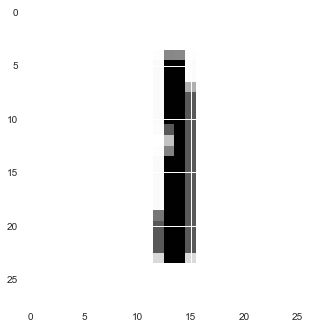

1


In [12]:
# visualize some samples
def drawing(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img)
    plt.show()
    
drawing(X_train[2])
print(Y_train[2])

# 4

In [13]:
# Euclidean Distance is being used to find the distance of plt from other plots
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

# k tells the no of neighbours I want
def knn(X, Y, query_x, k = 5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query_x, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals)
    # nearest k points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:, 1], return_counts = True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

# 5: Make prediction

In [14]:
pred = knn(X_train, Y_train, X_test[1])
print(int(pred))

(array([7.]), array([5], dtype=int64))
7


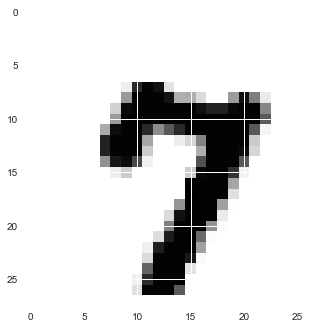

7


In [15]:
drawing(X_test[1])
print(Y_test[1])

In [17]:
# Find accuracy of KNN over the test set 